In [1]:
import requests, zipfile
import numpy as np
from zipfile import ZipFile
from pathlib import Path
import cv2,os,imghdr
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
device = 'cuda' if tf.test.is_gpu_available() else 'cpu'
device

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


'cpu'

In [2]:
import os
import shutil
from pathlib import Path

data_path = Path('data/')
happy_path = Path(data_path / 'happy')
sad_path = Path(data_path / 'sad')

if happy_path.is_dir():
  print(f'{happy_path} path already exists')
else:
  print(f'Creating {happy_path} path')
  happy_path.mkdir(parents=True,exist_ok=True)

with open('Happy.zip','wb') as f:
  url = 'https://github.com/raviteja6031/CNN-Image-Classification/raw/main/Happy.zip'
  request = requests.get(url)
  f.write(request.content)

with ZipFile('Happy.zip','r') as zip_file:
  print('unzipping the data')
  zip_file.extractall(happy_path)

with open('Sad.zip','wb') as f:
  url = 'https://github.com/raviteja6031/CNN-Image-Classification/raw/main/Sad.zip'
  request = requests.get(url)
  f.write(request.content)

with ZipFile('Sad.zip','r') as zip_file:
  print('unzipping the data')
  zip_file.extractall(sad_path)

# Remove all files and directories except 'happy' and 'sad'
for entry in os.listdir(data_path):
    entry_path = data_path / entry
    if entry != 'happy' and entry != 'sad':
        if entry_path.is_dir():
            shutil.rmtree(entry_path)
        else:
            os.remove(entry_path)

# Move files from nested directories to data/happy
for root, dirs, files in os.walk(happy_path):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            if os.path.isfile(file_path):
                shutil.move(file_path, happy_path)
        shutil.rmtree(dir_path)

print(f"Image files are now directly present in {happy_path}")

# Move files from nested directories to data/happy
for root, dirs, files in os.walk(sad_path):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            if os.path.isfile(file_path):
                shutil.move(file_path, sad_path)
        shutil.rmtree(dir_path)

print(f"Image files are now directly present in {sad_path}")

Creating data/happy path
unzipping the data
unzipping the data
Image files are now directly present in data/happy
Image files are now directly present in data/sad


In [3]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its content"""
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f'There are {len(dirname)} directories and {len(filename)} images in {dirpath}')

walk_through_dir(data_path)

There are 2 directories and 0 images in data
There are 0 directories and 8989 images in data/happy
There are 0 directories and 6077 images in data/sad


In [4]:
img_exts = ['jpeg','jpg','png','bmp']

In [5]:
for image_class in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path, image_class)):
        image_path = os.path.join(data_path, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/happy/.DS_Store


In [6]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    image_sizes = {}

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(happy_path, file_name)

            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Get the size of the image
                    width, height = img.size
                    file_size = os.path.getsize(file_path)

                    if file_size < 1024:  # Size less than 10KB (1KB = 1024 bytes)
                        os.remove(file_path)
                        print(f"Removed {file_name} - Size: {file_size} bytes")
                    else:
                        image_sizes[file_name] = (width, height)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return image_sizes

# Provide the path to the folder containing the images
folder_path = 'data/happy'
image_sizes = get_image_sizes(folder_path)

# Display the image sizes
for file_name, size in image_sizes.items():
    print(f"{file_name}: {size[0]}x{size[1]}")

Streaming output truncated to the last 5000 lines.
20684.png: 48x48
1677.png: 48x48
1219.png: 48x48
31620.png: 48x48
1749.png: 48x48
22893.png: 48x48
17871.png: 48x48
20543.png: 48x48
34867.png: 48x48
16731.png: 48x48
7670.png: 48x48
26119.png: 48x48
2649.png: 48x48
4620.png: 48x48
19154.png: 48x48
3251.png: 48x48
26622.png: 48x48
1499.png: 48x48
29101.png: 48x48
23585.png: 48x48
21543.png: 48x48
34553.png: 48x48
10772.png: 48x48
3022.png: 48x48
31910.png: 48x48
29778.png: 48x48
11076.png: 48x48
5054.png: 48x48
34524.png: 48x48
25431.png: 48x48
32066.png: 48x48
29856.png: 48x48
15762.png: 48x48
31359.png: 48x48
11558.png: 48x48
1842.png: 48x48
30052.png: 48x48
13284.png: 48x48
18541.png: 48x48
12442.png: 48x48
11585.png: 48x48
13774.png: 48x48
26098.png: 48x48
5462.png: 48x48
10471.png: 48x48
34841.png: 48x48
25591.png: 48x48
11422.png: 48x48
29800.png: 48x48
3957.png: 48x48
13945.png: 48x48
17168.png: 48x48
13461.png: 48x48
14757.png: 48x48
9416.png: 48x48
527.png: 48x48
13917.png: 48

In [7]:
def walk_through_dir(dir_path):
  """Walks through dir_path returning its content"""
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f'There are {len(dirname)} directories and {len(filename)} images in {dirpath}')

walk_through_dir(data_path)

There are 2 directories and 0 images in data
There are 0 directories and 8977 images in data/happy
There are 0 directories and 6077 images in data/sad


In [8]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    image_sizes = {}

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(sad_path, file_name)

            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Get the size of the image
                    width, height = img.size
                    file_size = os.path.getsize(file_path)

                    if file_size < 1024:  # Size less than 10KB (1KB = 1024 bytes)
                        os.remove(file_path)
                        print(f"Removed {file_name} - Size: {file_size} bytes")
                    else:
                        image_sizes[file_name] = (width, height)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return image_sizes

# Provide the path to the folder containing the images
folder_path = 'data/sad'
image_sizes = get_image_sizes(folder_path)

# Display the image sizes
for file_name, size in image_sizes.items():
    print(f"{file_name}: {size[0]}x{size[1]}")

Streaming output truncated to the last 5000 lines.
8383.png: 48x48
27613.png: 48x48
15311.png: 48x48
8238.png: 48x48
5088.png: 48x48
23364.png: 48x48
10103.png: 48x48
6445.png: 48x48
23054.png: 48x48
3306.png: 48x48
6449.png: 48x48
31471.png: 48x48
31009.png: 48x48
14459.png: 48x48
20577.png: 48x48
24302.png: 48x48
35486.png: 48x48
24693.png: 48x48
14655.png: 48x48
31351.png: 48x48
20395.png: 48x48
23297.png: 48x48
6084.png: 48x48
18518.png: 48x48
12119.png: 48x48
11103.png: 48x48
26612.png: 48x48
28978.png: 48x48
27570.png: 48x48
32233.png: 48x48
10655.png: 48x48
11149.png: 48x48
9340.png: 48x48
29135.png: 48x48
16905.png: 48x48
27009.png: 48x48
25225.png: 48x48
29317.png: 48x48
9720.png: 48x48
24927.png: 48x48
35746.png: 48x48
27699.png: 48x48
21903.png: 48x48
30988.png: 48x48
21477.png: 48x48
30540.png: 48x48
305.png: 48x48
484.png: 48x48
22149.png: 48x48
1091.png: 48x48
23407.png: 48x48
23110.png: 48x48
20351.png: 48x48
15167.png: 48x48
9794.png: 48x48
6930.png: 48x48
3149.png: 48x

In [9]:
def check_image_sizes(folder_path,file_path):
    small_images = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = file_path

            try:
                # Get the size of the image
                file_size = os.path.getsize(file_path)

                if file_size < 1024:  # Size less than 10KB (10KB = 10240 bytes)
                    small_images.append(file_name)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return small_images

In [10]:
# Provide the path to the folder containing the images
file_path = os.path.join(sad_path, file_name)
folder_path = 'data/sad'
small_images = check_image_sizes(folder_path,file_path)

if small_images:
    print("The following images are less than 1KB in sad folder:")
    for image in small_images:
        print(image)
else:
    print("No images found with a size less than 1KB in sad folder.")


No images found with a size less than 1KB in sad folder.


In [11]:
import os

def check_image_sizes(folder_path):
    small_images = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(happy_path, file_name)

            try:
                # Get the size of the image
                file_size = os.path.getsize(file_path)

                if file_size < 1024:  # Size less than 10KB (10KB = 10240 bytes)
                    small_images.append(file_name)
                    # print(file_name)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return small_images

# Provide the path to the folder containing the images
folder_path = 'data/happy'
small_images = check_image_sizes(folder_path)

if small_images:
    print("The following images are less than 1KB:")
    for image in small_images:
        print(image)
else:
    print("No images found with a size less than 1KB.")

No images found with a size less than 1KB.


In [12]:
img = cv2.imread(os.path.join('data','happy','10000.png'))

(-0.5, 47.5, 47.5, -0.5)

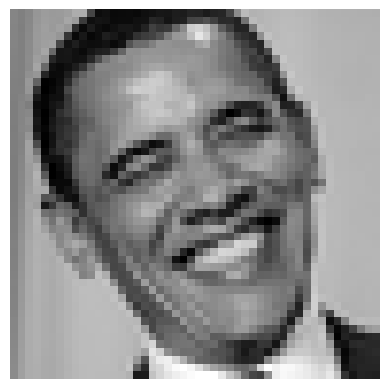

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis(False)

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 15050 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator() #helpful when using very large dataset
data_iterator

In [16]:
batch = data_iterator.next()
batch

(array([[[[148., 148., 148.],
          [148., 148., 148.],
          [148., 148., 148.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         [[148., 148., 148.],
          [148., 148., 148.],
          [148., 148., 148.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         [[148., 148., 148.],
          [148., 148., 148.],
          [148., 148., 148.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         ...,
 
         [[ 61.,  61.,  61.],
          [ 61.,  61.,  61.],
          [ 61.,  61.,  61.],
          ...,
          [ 37.,  37.,  37.],
          [ 37.,  37.,  37.],
          [ 37.,  37.,  37.]],
 
         [[ 61.,  61.,  61.],
          [ 61.,  61.,  61.],
          [ 61.,  61.,  61.],
          ...,
          [ 37.,  37.,  37.],
          [ 37.,  37.,  37.],
          [ 37.,  37.,  37.

In [17]:
# 0 for happy
# 1 for sad
batch[1]

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int32)

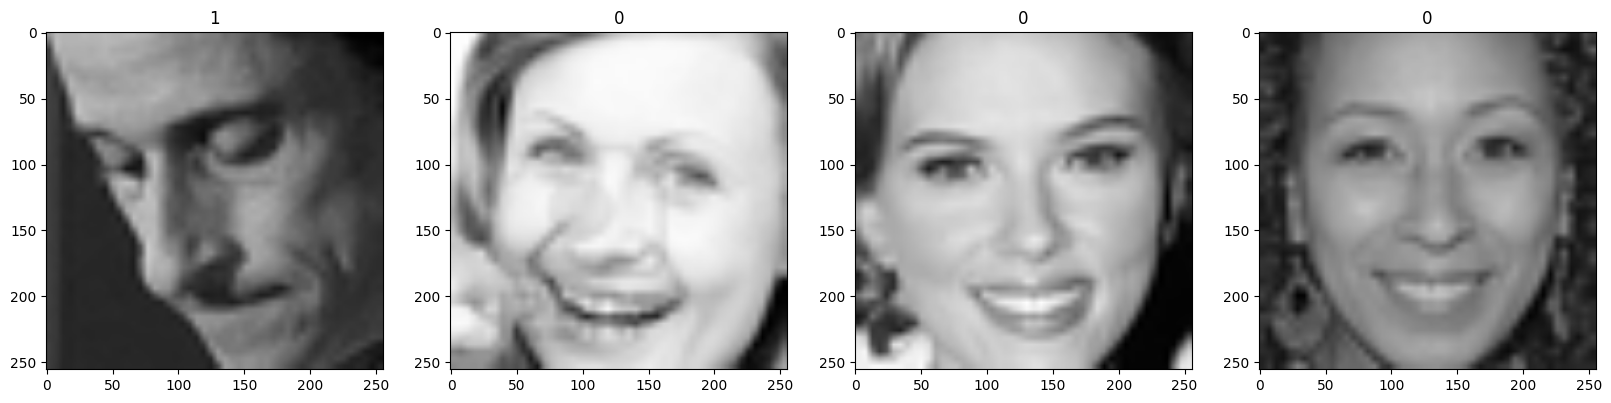

In [18]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y: (x/255,y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

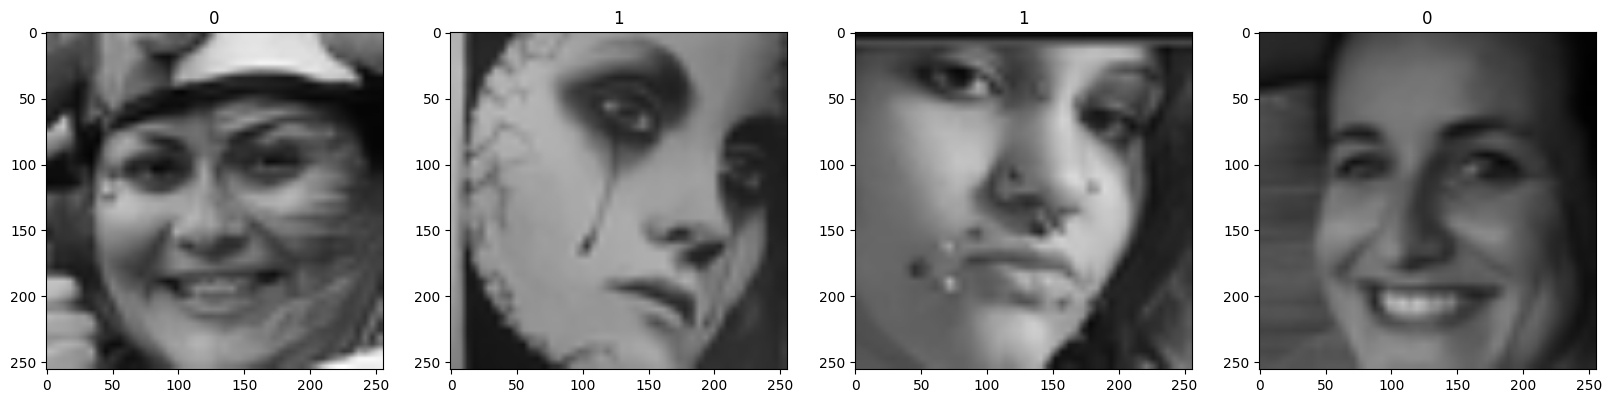

In [22]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [23]:
batch[0].min(),batch[0].max()

(0.0, 1.0)

In [24]:
len(data)

471

In [25]:
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.1) + 1
validation_size = int(len(data) * 0.2)

In [26]:
print(train_size+test_size+validation_size)

471


In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(validation_size)
test = data.skip(train_size+validation_size).take(test_size)

In [28]:
len(train),len(test),len(val)

(329, 48, 94)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten,Dropout
from tensorflow.keras.layers import Dropout, BatchNormalization

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 128, 128, 16)      64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                        

In [34]:
from genericpath import exists
logdir= 'logs'
if not logdir:
  os.mkdir(path=logdir)
else:
  print('Logs file already exists')

Logs file already exists


In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train,epochs=5,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/5
329/329 [==============================] - 989s 3s/step - loss: 0.7053 - accuracy: 0.6400 - val_loss: 0.8444 - val_accuracy: 0.5419
Epoch 2/5
329/329 [==============================] - 1002s 3s/step - loss: 0.5524 - accuracy: 0.7046 - val_loss: 0.8055 - val_accuracy: 0.5499
Epoch 3/5
329/329 [==============================] - 997s 3s/step - loss: 0.5144 - accuracy: 0.7328 - val_loss: 0.6311 - val_accuracy: 0.5904
Epoch 4/5
329/329 [==============================] - 993s 3s/step - loss: 0.4820 - accuracy: 0.7494 - val_loss: 0.5021 - val_accuracy: 0.7277
Epoch 5/5
329/329 [==============================] - 992s 3s/step - loss: 0.4469 - accuracy: 0.7750 - val_loss: 0.4380 - val_accuracy: 0.7846


In [39]:
hist

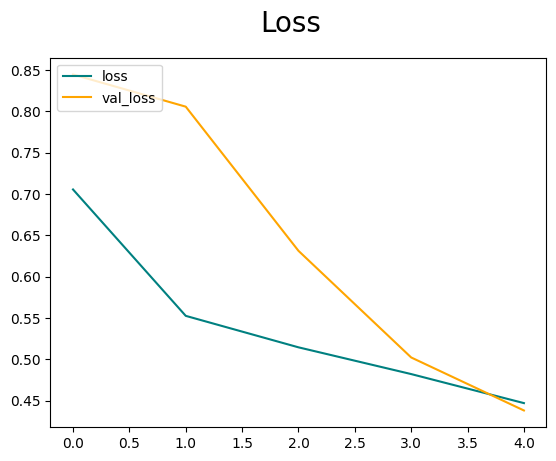

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
plt.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

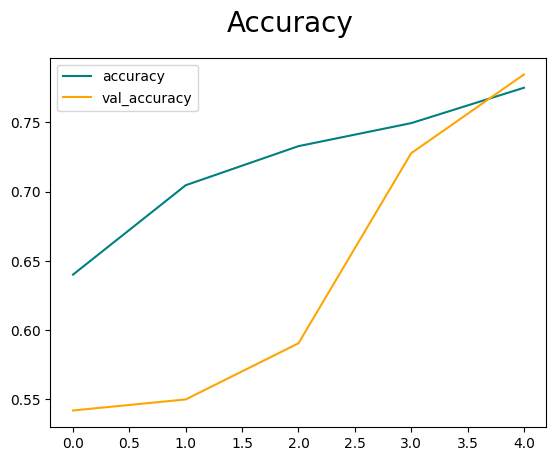

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 313ms/step


In [45]:
print(f'Precision: {pre.result().numpy()} | Recall: {re.result().numpy()} | Accuracy: {acc.result().numpy()}')


Precision: 0.7330895662307739 | Recall: 0.6672213077545166 | Accuracy: 0.7714663147926331


In [46]:
testdata_path = Path('/content/testdata/')
if testdata_path.is_dir():
  print(f'{testdata_path} path already exists.....')
else:
  print(f'Creating {testdata_path} path.....')
  testdata_path.mkdir(parents=True,exist_ok=True)

Creating /content/testdata path.....


In [47]:
import requests

# Download and save happytest.png
with open('/content/testdata/happytest.png', 'wb') as f:
    request = requests.get('https://github.com/raviteja6031/CNN-Image-Classification/raw/main/happytest.png')
    f.write(request.content)

# Download and save sadtest.png
with open('/content/testdata/sadtest.png', 'wb') as f:
    request = requests.get('https://github.com/raviteja6031/CNN-Image-Classification/raw/main/sadtest.png')
    f.write(request.content)

In [59]:
def classify(yhat: float, threshold: float = 0.6):
    if yhat < threshold:
        print('Predicted class is happy')
    else:
        print('Predicted class is sad')

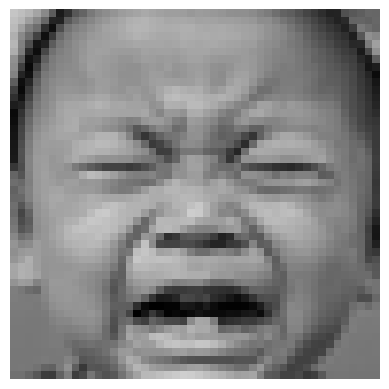

In [60]:
import cv2
import matplotlib.pyplot as plt

# Read sadtest.png from the current directory
sadtest = cv2.imread('/content/testdata/sadtest.png')

# Check if the image is successfully loaded
if sadtest is not None:
    # Convert BGR to RGB and display the image
    plt.imshow(cv2.cvtColor(sadtest, cv2.COLOR_BGR2RGB))
    plt.axis(False)
    plt.show()
else:
    print("Error: Unable to load the image.")

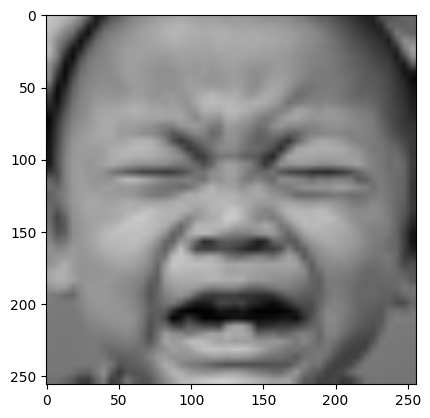

In [61]:
resize = tf.image.resize(sadtest,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
yhat = model.predict(np.expand_dims(resize/255,0)) #expand_dims because the nn expects us to pass the batch of images and not a single image, so expand_dims encapsulates it
yhat

1/1 [==============================] - 0s 48ms/step


array([[0.6628188]], dtype=float32)

In [63]:
classify(yhat)

Predicted class is sad


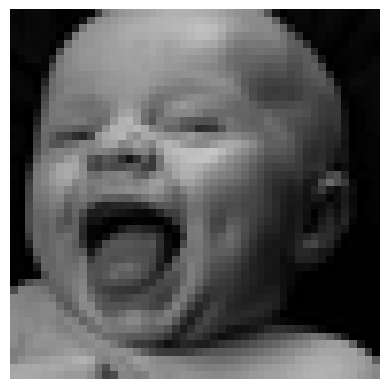

In [64]:
import cv2
import matplotlib.pyplot as plt

# Read happytest.png from the current directory
happytest = cv2.imread('/content/testdata/happytest.png')

# Check if the image is successfully loaded
if happytest is not None:
    # Convert BGR to RGB and display the image
    plt.imshow(cv2.cvtColor(happytest, cv2.COLOR_BGR2RGB))
    plt.axis(False)
    plt.show()
else:
    print("Error: Unable to load the image.")

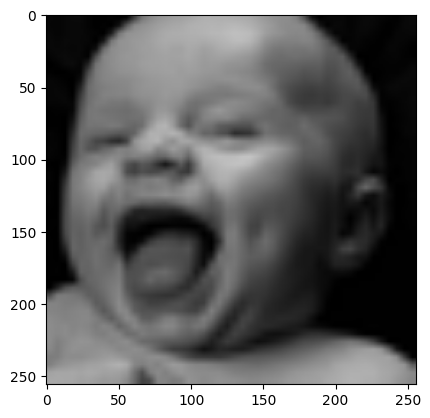

In [65]:
resize = tf.image.resize(happytest,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
yhat = model.predict(np.expand_dims(resize/255,0)) #expand_dims because the nn expects us to pass the batch of images and not a single image, so expand_dims encapsulates it
yhat

1/1 [==============================] - 0s 50ms/step


array([[0.59642375]], dtype=float32)

In [67]:
classify(yhat)

Predicted class is happy
